# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | My son and I flew to Geneva...
1,✅ Trip Verified | For the price paid (bought ...
2,✅ Trip Verified | Flight left on time and arr...
3,✅ Trip Verified | Very Poor Business class pr...
4,Not Verified | This review is for LHR-SYD-LHR....


In [5]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
df.head()

,reviews
0,✅ Trip Verified | My son and I flew to Geneva...
1,✅ Trip Verified | For the price paid (bought ...
2,✅ Trip Verified | Flight left on time and arr...
3,✅ Trip Verified | Very Poor Business class pr...
4,Not Verified | This review is for LHR-SYD-LHR....


#### Remove | from review colomn

In [7]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [8]:
df.head(10)

,reviews
0,My son and I flew to Geneva last Sunday for ...
1,For the price paid (bought during a sale) it...
2,Flight left on time and arrived over half an...
3,"Very Poor Business class product, BA is not ..."
4,This review is for LHR-SYD-LHR. BA015 and BA0...
5,Absolutely pathetic business class product. B...
6,Overall not bad. Staff look tired and overwo...
7,This was our first flight with British Airway...
8,I recently encountered a highly disappointing...
9,Beware! BA don't provide any refund due to a...


### Data Cleaning - Text Cleaning

In [9]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,My son and I flew to Geneva last Sunday for ...,My son and I flew to Geneva last Sunday for a...
1,For the price paid (bought during a sale) it...,For the price paid bought during a sale it wa...
2,Flight left on time and arrived over half an...,Flight left on time and arrived over half an ...
3,"Very Poor Business class product, BA is not ...",Very Poor Business class product BA is not ev...
4,This review is for LHR-SYD-LHR. BA015 and BA0...,This review is for LHR SYD LHR BA and BA Busi...


### Tokenization, removal of stopwords and obtaining stemwords

In [10]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\INDIA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\INDIA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\INDIA\AppData\Roaming\nltk_data...


### POS Tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

In [11]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\INDIA\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\INDIA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,My son and I flew to Geneva last Sunday for ...,My son and I flew to Geneva last Sunday for a...,"[(son, n), (flew, v), (Geneva, n), (last, a), ..."
1,For the price paid (bought during a sale) it...,For the price paid bought during a sale it wa...,"[(price, n), (paid, v), (bought, n), (sale, n)..."
2,Flight left on time and arrived over half an...,Flight left on time and arrived over half an ...,"[(Flight, n), (left, v), (time, n), (arrived, ..."
3,"Very Poor Business class product, BA is not ...",Very Poor Business class product BA is not ev...,"[(Poor, n), (Business, n), (class, n), (produc..."
4,This review is for LHR-SYD-LHR. BA015 and BA0...,This review is for LHR SYD LHR BA and BA Busi...,"[(review, n), (LHR, n), (SYD, n), (LHR, n), (B..."


### Obtaining Stem Words

In [12]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,My son and I flew to Geneva last Sunday for ...,My son and I flew to Geneva last Sunday for a...,"[(son, n), (flew, v), (Geneva, n), (last, a), ...",son fly Geneva last Sunday skiing holiday Le...
1,For the price paid (bought during a sale) it...,For the price paid bought during a sale it wa...,"[(price, n), (paid, v), (bought, n), (sale, n)...",price pay bought sale decent experience alth...
2,Flight left on time and arrived over half an...,Flight left on time and arrived over half an ...,"[(Flight, n), (left, v), (time, n), (arrived, ...",Flight leave time arrive half hour earlier s...
3,"Very Poor Business class product, BA is not ...",Very Poor Business class product BA is not ev...,"[(Poor, n), (Business, n), (class, n), (produc...",Poor Business class product BA even close ai...
4,This review is for LHR-SYD-LHR. BA015 and BA0...,This review is for LHR SYD LHR BA and BA Busi...,"[(review, n), (LHR, n), (SYD, n), (LHR, n), (B...",review LHR SYD LHR BA BA Business class conf...


# Sentiment analysis using VADER Library

In [14]:
!pip install vaderSentiment

     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
     ------------ ------------------------ 41.0/126.0 kB 279.3 kB/s eta 0:00:01
     ------------------------------------ 126.0/126.0 kB 737.0 kB/s eta 0:00:00


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,My son and I flew to Geneva last Sunday for ...,My son and I flew to Geneva last Sunday for a...,"[(son, n), (flew, v), (Geneva, n), (last, a), ...",son fly Geneva last Sunday skiing holiday Le...,-0.8506,Negative
1,For the price paid (bought during a sale) it...,For the price paid bought during a sale it wa...,"[(price, n), (paid, v), (bought, n), (sale, n)...",price pay bought sale decent experience alth...,0.9100,Positive
2,Flight left on time and arrived over half an...,Flight left on time and arrived over half an ...,"[(Flight, n), (left, v), (time, n), (arrived, ...",Flight leave time arrive half hour earlier s...,-0.7650,Negative
3,"Very Poor Business class product, BA is not ...",Very Poor Business class product BA is not ev...,"[(Poor, n), (Business, n), (class, n), (produc...",Poor Business class product BA even close ai...,-0.2263,Negative
4,This review is for LHR-SYD-LHR. BA015 and BA0...,This review is for LHR SYD LHR BA and BA Busi...,"[(review, n), (LHR, n), (SYD, n), (LHR, n), (B...",review LHR SYD LHR BA BA Business class conf...,0.9652,Positive


In [16]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    481
Negative    412
Neutral     107
Name: count, dtype: int64

### Visualization

([<matplotlib.patches.Wedge at 0x1a34bae5510>,
 [Text(0.06562028214553672, 1.0980409730839467, 'Positive'),
  Text(-0.4241423504541015, -1.014940031012311, 'Negative'),
  Text(1.274442496352635, -0.4453047535008627, 'Neutral')],
 [Text(0.03579288117029275, 0.5989314398639708, '48.1%'),
  Text(-0.2313503729749644, -0.5536036532794422, '41.2%'),
  Text(0.8024267569627701, -0.2803770670190617, '10.7%')])

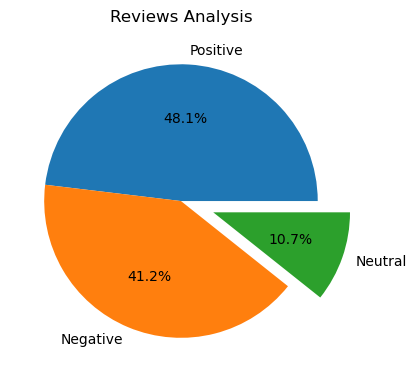

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

## Wordcloud 

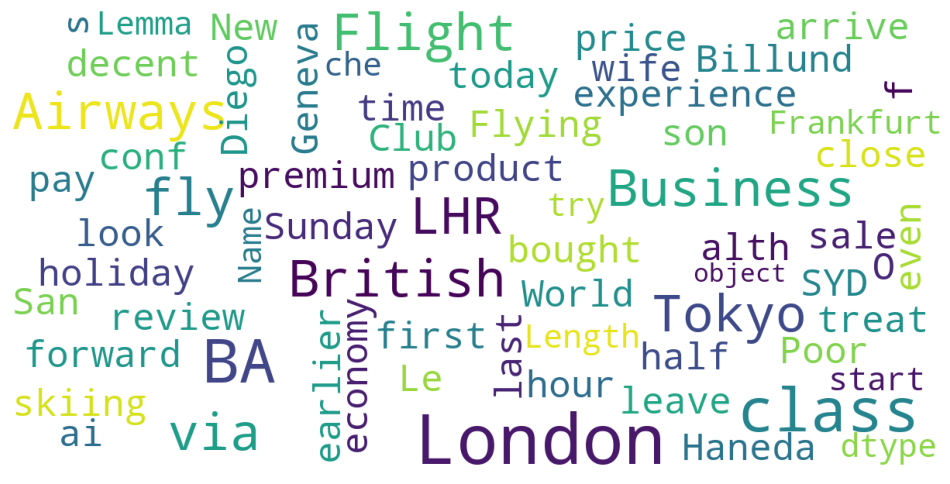

In [18]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)